XGBoost model loaded successfully from xgb_model.json
Found 455 rows for product: VIU Premium


d:\Skripsi\Model Steps\Preprocessing\Step 1\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_65 (LSTM)                  │ (None, 50)             │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,101 (47.27 KB)

 Trainable params: 12,101 (47.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 0.0188 - mae: 0.0846 - rmse: 0.1141 - val_loss: 0.0489 - val_mae: 0.1400 - val_rmse: 0.2093 - learning_rate: 0.0010
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0093 - mae: 0.0518 - rmse: 0.0668 - val_loss: 0.0334 - val_mae: 0.1056 - val_rmse: 0.1706 - learning_rate: 0.0010
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0086 - mae: 0.0547 - rmse: 0.0670 - val_loss: 0.0346 - val_mae: 0.1090 - val_rmse: 0.1760 - learning_rate: 0.0010
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0074 - mae: 0.0456 - rmse: 0.0617 - val_loss: 0.0326 - val_mae: 0.1054 - val_rmse: 0.1717 - learning_rate: 0.0010
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0073 - mae: 0.0477 - rmse: 0.0651 - val_loss: 0.0269 - val_mae: 0.0918 - val_rmse: 0.1555 - learning_rate: 0.0010
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - mae: 0.0450 - rmse: 0.0573 - val_loss: 0.0249 - val

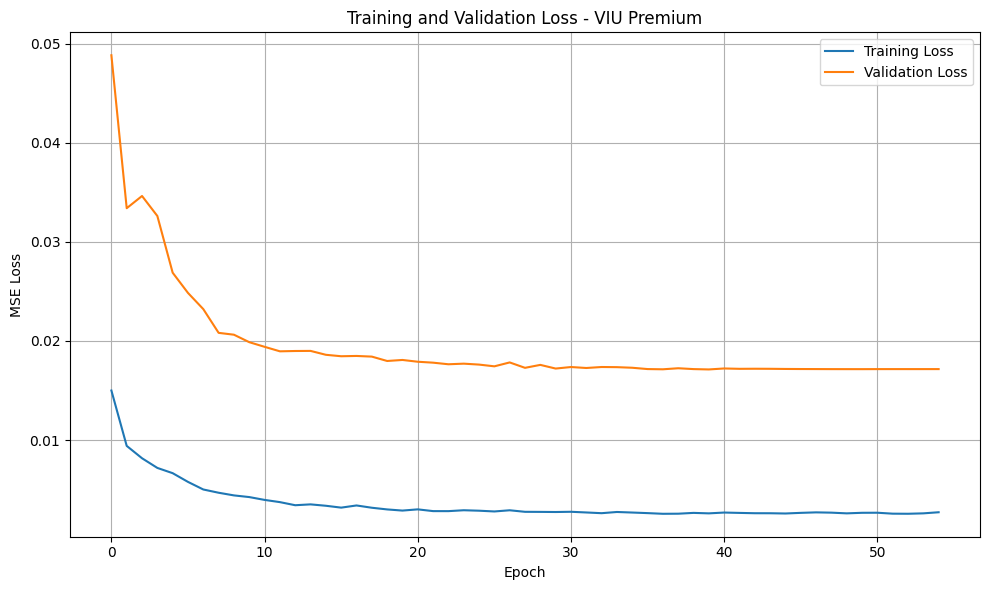


Starting Forecasting and Classification Process
Day  1/30 | Forecasted Revenue: 1436131.81 -> XGBoost Class: Good for Sale
Day  2/30 | Forecasted Revenue: 1533658.79 -> XGBoost Class: Good for Sale
Day  3/30 | Forecasted Revenue: 1565108.91 -> XGBoost Class: Good for Sale
Day  4/30 | Forecasted Revenue: 1568454.28 -> XGBoost Class: Good for Sale
Day  5/30 | Forecasted Revenue: 1558993.52 -> XGBoost Class: Good for Sale
Day  6/30 | Forecasted Revenue: 1544054.64 -> XGBoost Class: Good for Sale
Day  7/30 | Forecasted Revenue: 1526917.89 -> XGBoost Class: Good for Sale
Day  8/30 | Forecasted Revenue: 1509083.02 -> XGBoost Class: Good for Sale
Day  9/30 | Forecasted Revenue: 1491224.17 -> XGBoost Class: Good for Sale
Day 10/30 | Forecasted Revenue: 1473641.11 -> XGBoost Class: Good for Sale
Day 11/30 | Forecasted Revenue: 1456462.89 -> XGBoost Class: Good for Sale
Day 12/30 | Forecasted Revenue: 1439739.44 -> XGBoost Class: Good for Sale
Day 13/30 | Forecasted Revenue: 1423485.84 -> XGBoo

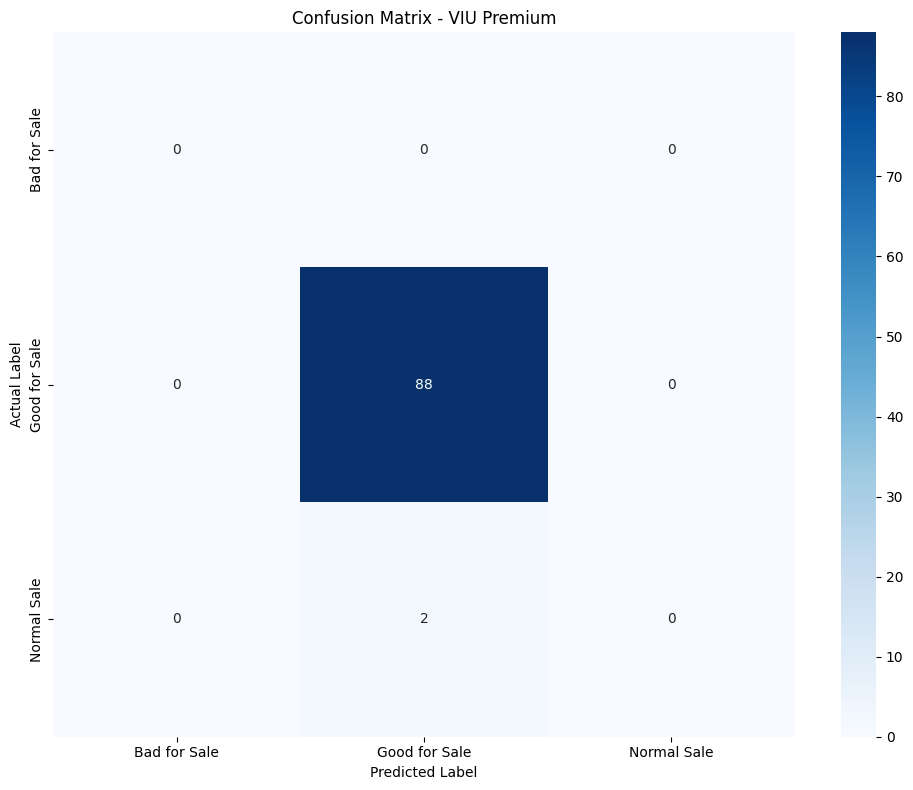


Test results with classification saved to: ./test-result/VIU_Premium_predictions_vs_actuals.csv


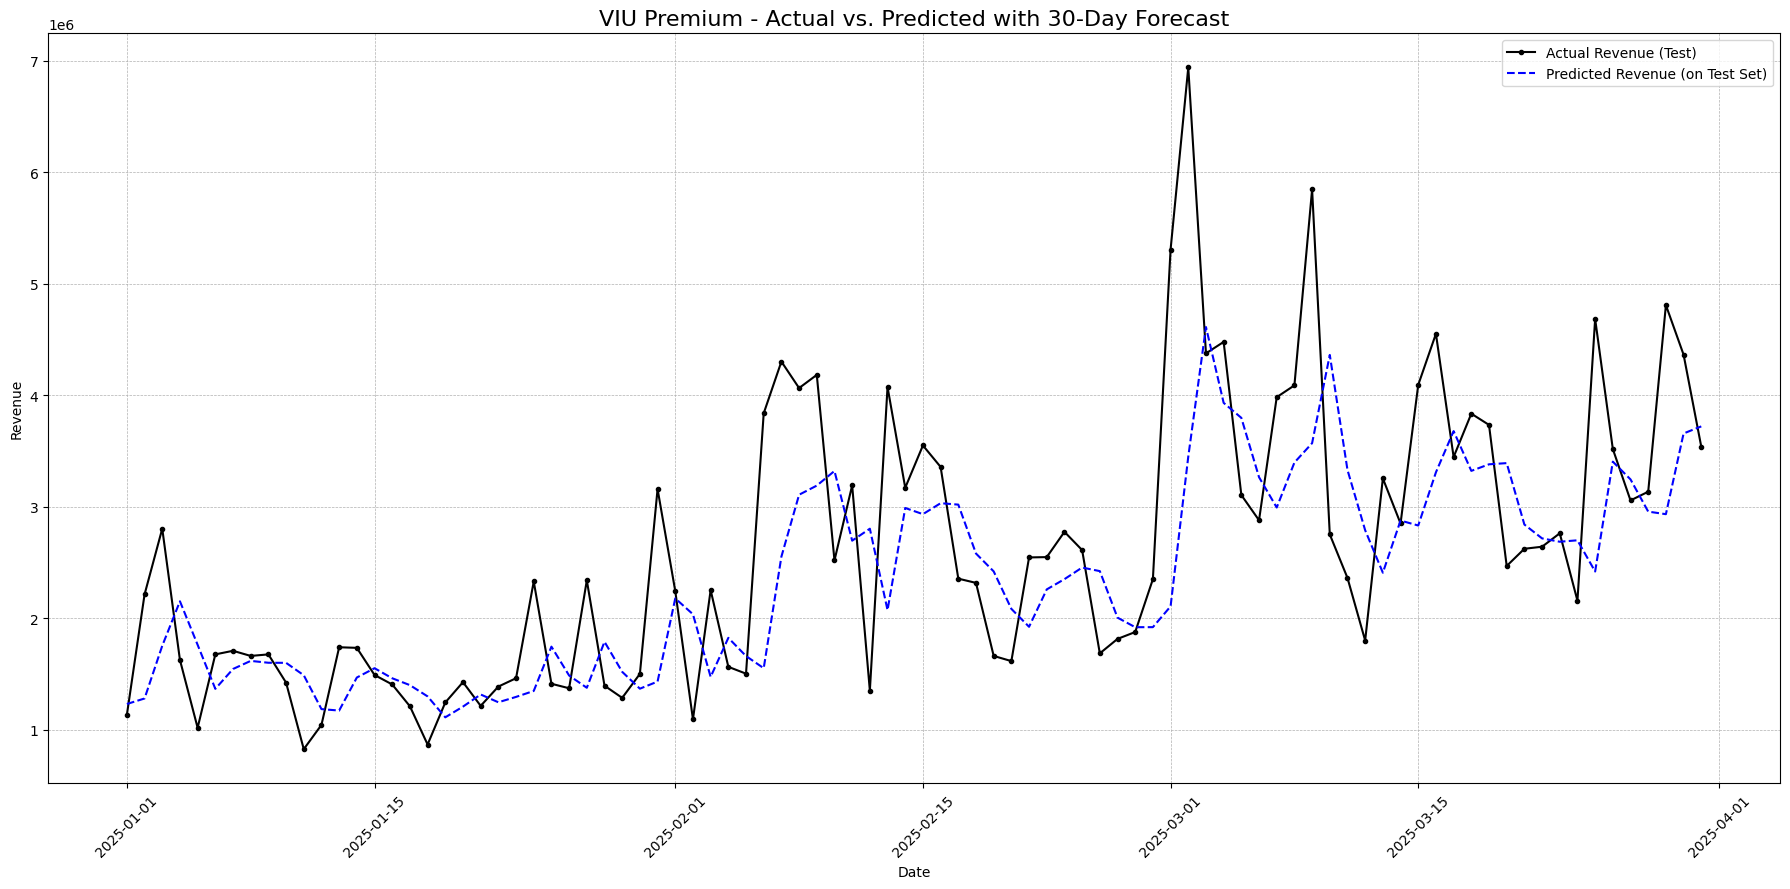


LSTM Model saved to ./model/lstm_model_VIU Premium.h5
Script finished.


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
import xgboost as xgb
import os

# --- Utility Functions ---
def calculate_rmspe(y_true, y_pred):
    """
    Calculates the Root Mean Squared Percentage Error between true and predicted values.
    """
    non_zero_mask = y_true != 0
    y_true_safe = y_true[non_zero_mask]
    y_pred_safe = y_pred[non_zero_mask]

    if len(y_true_safe) == 0:
        print("Warning: Cannot calculate RMSPE because all true values are zero.")
        return np.nan

    percentage_error = (y_true_safe - y_pred_safe) / y_true_safe
    rmspe = np.sqrt(np.mean(np.square(percentage_error))) * 100
    return rmspe

# --- Configuration ---
product_name = 'VIU Premium'
SEQ_LEN = 1
EPOCHS = 100 
BATCH_SIZE = 27
FUTURE_DAYS = 30
VAL_SPLIT = 0.2
train_test_split_ratio = 0.8
XGB_MODEL_PATH = 'xgb_model.json'
# IMPORTANT: Set this to the name of the column in your CSV that contains the true class labels
# This column can contain either integers (0, 1, 2) or strings ('Bad for Sale', 'Good for Sale', etc.)
TRUE_CLASS_COLUMN_NAME = 'revenue_class' 

# Feature columns for the LSTM model
lstm_features = [
    'total_revenue',
    'total_revenue_ema_10',
    'total_revenue_lag_1'
]

# Define the exact feature names the XGBoost model was trained on.
xgb_features = ['total_revenue']

# Mapping for classification results
class_mapping = {
    0: 'Bad for Sale',
    1: 'Good for Sale',
    2: 'Normal Sale'
}
# Create a list of labels for the confusion matrix and classification report
class_labels = [class_mapping[i] for i in sorted(class_mapping.keys())]


# --- Create Directories ---
os.makedirs('./loss-plot', exist_ok=True)
os.makedirs('./test-plot', exist_ok=True)
os.makedirs('./test-result', exist_ok=True)
os.makedirs('./model', exist_ok=True)
os.makedirs('./forecast-result', exist_ok=True)

# --- Data Loading and Preparation ---
try:
    full_df = pd.read_csv('final_dataset.csv', parse_dates=['Tanggal'])
except FileNotFoundError:
    print("Error: 'final_dataset.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# --- Load XGBoost Model ---
try:
    xgb_classifier = xgb.Booster()
    xgb_classifier.load_model(XGB_MODEL_PATH)
    print(f"XGBoost model loaded successfully from {XGB_MODEL_PATH}")
except xgb.core.XGBoostError as e:
    print(f"Error: Could not load XGBoost model from '{XGB_MODEL_PATH}'. Details: {e}")
    exit()

# --- Feature Engineering ---
product_df_base = full_df[full_df['Produk'] == product_name].copy()
print(f"Found {len(product_df_base)} rows for product: {product_name}")

if product_df_base.empty:
    print(f"No data found for product: {product_name} in 'final_dataset.csv'.")
    exit()

product_df_base = product_df_base.sort_values('Tanggal').reset_index(drop=True)

if 'total_revenue' not in product_df_base.columns:
    print("Error: 'total_revenue' column is missing.")
    exit()

# Create features for the LSTM model
product_df_base['total_revenue_ema_10'] = product_df_base['total_revenue'].ewm(span=10, adjust=False).mean()
product_df_base['total_revenue_lag_1'] = product_df_base['total_revenue'].shift(1)
product_df_cleaned = product_df_base.dropna(subset=lstm_features).reset_index(drop=True)

if product_df_cleaned.empty:
    print(f"Error: No data remains for {product_name} after dropping NaNs.")
    exit()

# Check if the true class column exists for generating evaluation reports
run_classification_evaluation = TRUE_CLASS_COLUMN_NAME in product_df_cleaned.columns
if not run_classification_evaluation:
    print(f"\nWarning: True class column '{TRUE_CLASS_COLUMN_NAME}' not found in the data.")
    print("Classification report and confusion matrix will be skipped.")

# --- Train/Test Split ---
split_index = int(len(product_df_cleaned) * train_test_split_ratio)
train_df = product_df_cleaned.iloc[:split_index].copy()
test_df = product_df_cleaned.iloc[split_index:].copy()

if train_df.empty:
    print(f"Error: Training set is empty for product: {product_name}.")
    exit()

# --- Data Scaling and Sequencing for LSTM ---
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df[lstm_features])
test_scaled = scaler.transform(test_df[lstm_features])

def create_sequences(data, seq_len=SEQ_LEN):
    x, y = [], []
    if len(data) <= seq_len:
        return np.array(x), np.array(y)
    for i in range(seq_len, len(data)):
        x.append(data[i-seq_len:i])
        y.append(data[i][0])
    return np.array(x), np.array(y)

x_train, y_train = create_sequences(train_scaled)
x_test, y_test = create_sequences(test_scaled)

if x_train.shape[0] == 0:
    print(f"Error: Not enough data to create training sequences for {product_name} with SEQ_LEN={SEQ_LEN}.")
    exit()

# --- LSTM Model Building and Training ---
model = Sequential([
    LSTM(units=50, activation='tanh', input_shape=(SEQ_LEN, len(lstm_features)), kernel_regularizer=l2(0.001), return_sequences=False),
    Dropout(0.3),
    Dense(units=25, activation='relu'),
    Dense(1)
])
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', RootMeanSquaredError(name='rmse')])
model.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_lr=1e-6)
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=VAL_SPLIT, callbacks=[early_stopping, reduce_lr], verbose=1)

# --- Plotting and Saving ---
filename_base = product_name.replace(" ", "_").replace("/", "_")
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f"Training and Validation Loss - {product_name}")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f'./loss-plot/{filename_base}_loss_plot.png')
plt.show()

# --- Forecasting Logic with Integrated XGBoost Classification ---
print("\n" + "="*50); print("Starting Forecasting and Classification Process"); print("="*50)
current_sequence_scaled = train_scaled[-SEQ_LEN:].copy()
history_df_unscaled = train_df.copy()
lstm_forecasts, xgboost_classifications = [], []
for day_step in range(FUTURE_DAYS):
    input_for_lstm = current_sequence_scaled.reshape(1, SEQ_LEN, len(lstm_features))
    pred_scaled_revenue = model.predict(input_for_lstm, verbose=0)[0, 0]
    dummy_scaled_row = np.zeros((1, len(lstm_features))); dummy_scaled_row[0, 0] = pred_scaled_revenue
    pred_unscaled_revenue = scaler.inverse_transform(dummy_scaled_row)[0, 0]
    lstm_forecasts.append(pred_unscaled_revenue)
    last_tanggal = history_df_unscaled['Tanggal'].iloc[-1]
    next_tanggal = last_tanggal + pd.Timedelta(days=1)
    new_row_dict = {'Tanggal': next_tanggal, 'Produk': product_name, 'total_revenue': pred_unscaled_revenue}
    history_df_unscaled = pd.concat([history_df_unscaled, pd.DataFrame([new_row_dict])], ignore_index=True)
    temp_df_for_features = history_df_unscaled.copy()
    temp_df_for_features['total_revenue_ema_10'] = temp_df_for_features['total_revenue'].ewm(span=10, adjust=False).mean()
    temp_df_for_features['total_revenue_lag_1'] = temp_df_for_features['total_revenue'].shift(1)
    xgb_features_for_prediction = temp_df_for_features[xgb_features].iloc[-1:].copy()
    dmatrix_for_xgb = xgb.DMatrix(xgb_features_for_prediction)
    xgb_prediction_proba = xgb_classifier.predict(dmatrix_for_xgb)
    xgb_predicted_class_int = int(round(xgb_prediction_proba[0]))
    xgb_predicted_class_str = class_mapping.get(xgb_predicted_class_int, 'Unknown')
    xgboost_classifications.append(xgb_predicted_class_str)
    print(f"Day {day_step+1:>2}/{FUTURE_DAYS} | Forecasted Revenue: {pred_unscaled_revenue:10.2f} -> XGBoost Class: {xgb_predicted_class_str}")
    next_full_unscaled_feature_row = temp_df_for_features[lstm_features].iloc[-1:]
    next_full_scaled_feature_row = scaler.transform(next_full_unscaled_feature_row)
    current_sequence_scaled = np.vstack((current_sequence_scaled[1:], next_full_scaled_feature_row))

forecast_dates = pd.date_range(start=history_df_unscaled['Tanggal'].iloc[-FUTURE_DAYS], periods=FUTURE_DAYS)
forecast_results_df = pd.DataFrame({'Tanggal': forecast_dates, 'Produk': product_name, 'lstm_forecasted_revenue': lstm_forecasts, 'xgboost_predicted_class': xgboost_classifications})
forecast_filename = f'./forecast-result/{filename_base}_forecast_and_classification.csv'
forecast_results_df.to_csv(forecast_filename, index=False)
print("="*50); print(f"Combined forecast and classification results saved to: {forecast_filename}"); print("="*50)

# --- Model Evaluation on Test Set ---
if x_test.shape[0] > 0 and len(y_test) > 0:
    true_y_test_scaled = y_test.reshape(-1, 1)
    padding_test = np.zeros((len(true_y_test_scaled), len(lstm_features) - 1))
    true_y_inverse = scaler.inverse_transform(np.hstack((true_y_test_scaled, padding_test)))[:, 0]
    pred_test_scaled = model.predict(x_test, verbose=0)
    pred_test_rescaled = scaler.inverse_transform(np.hstack((pred_test_scaled, np.zeros((len(pred_test_scaled), len(lstm_features) - 1)))))[:, 0]
    rmspe_value = calculate_rmspe(true_y_inverse, pred_test_rescaled)
    print("\n" + "="*47); print("        LSTM Model Evaluation Results (Test Set)"); print("-"*47)
    print(f"Product: {product_name}\nRoot Mean Squared Percentage Error (RMSPE): {rmspe_value:.2f}%")
    
    # --- XGBoost Classification on Test Set Predictions ---
    print("\n" + "="*47); print("     XGBoost Classification Evaluation (Test Set)"); print("-"*47)
    test_predictions_df = pd.DataFrame(pred_test_rescaled, columns=['total_revenue'])
    dmatrix_for_test_preds = xgb.DMatrix(test_predictions_df[xgb_features])
    test_xgb_preds_proba = xgb_classifier.predict(dmatrix_for_test_preds)
    test_xgb_preds_int = np.round(test_xgb_preds_proba).astype(int)
    test_xgb_preds_str = [class_mapping.get(p, 'Unknown') for p in test_xgb_preds_int]

    # --- Generate Classification Report and Confusion Matrix IF true labels exist ---
    if run_classification_evaluation:
        # Get true labels, ensuring they align with the predictions
        true_classes_raw = test_df[TRUE_CLASS_COLUMN_NAME].iloc[SEQ_LEN : SEQ_LEN + len(test_xgb_preds_int)].values
        
        # ** FIX: Convert true labels to integers if they are strings **
        # Create a reverse mapping from string to integer
        reverse_class_mapping = {v: k for k, v in class_mapping.items()}
        # Check if the first element is a string to decide if mapping is needed
        if isinstance(true_classes_raw[0], str):
            true_classes_int = pd.Series(true_classes_raw).map(reverse_class_mapping).fillna(-1).astype(int).values
            print("Converted string-based true labels to integers for evaluation.")
        else:
            true_classes_int = true_classes_raw.astype(int)

        # Filter out any labels that couldn't be mapped (value is -1)
        valid_indices = true_classes_int != -1
        true_classes_final = true_classes_int[valid_indices]
        preds_final = np.array(test_xgb_preds_int)[valid_indices]

        # --- Classification Report ---
        if len(true_classes_final) > 0:
            report = classification_report(
                true_classes_final, 
                preds_final, 
                labels=list(class_mapping.keys()),
                target_names=class_labels,
                zero_division=0
            )
            print("Classification Report:\n", report)
        
            # --- Confusion Matrix ---
            cm = confusion_matrix(true_classes_final, preds_final, labels=list(class_mapping.keys()))
            plt.figure(figsize=(10, 8))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                        xticklabels=class_labels, 
                        yticklabels=class_labels)
            plt.title(f'Confusion Matrix - {product_name}')
            plt.ylabel('Actual Label')
            plt.xlabel('Predicted Label')
            plt.tight_layout()
            cm_filename = f'./test-plot/{filename_base}_confusion_matrix.png'
            plt.savefig(cm_filename)
            print(f"Confusion matrix plot saved to: {cm_filename}")
            plt.show()
        else:
            print("Could not generate classification report: No valid true labels found after mapping.")

    else:
         print("Classification report and confusion matrix skipped as true class column was not found.")
    
    print("="*47)
    
    actual_test_dates = test_df['Tanggal'].iloc[SEQ_LEN : SEQ_LEN + len(true_y_inverse)]
    if not actual_test_dates.empty:
        results_df = test_df.loc[actual_test_dates.index].copy()
        results_df['predicted_revenue'] = pred_test_rescaled
        results_df['xgboost_predicted_class'] = test_xgb_preds_str
        results_df.rename(columns={'total_revenue': 'actual_revenue'}, inplace=True)
        results_filename = f'./test-result/{filename_base}_predictions_vs_actuals.csv'
        results_df.to_csv(results_filename, index=False)
        print(f"\nTest results with classification saved to: {results_filename}")

    if not actual_test_dates.empty:
        plt.figure(figsize=(18, 9))
        plt.plot(actual_test_dates, true_y_inverse, label='Actual Revenue (Test)', color='black', marker='.', linestyle='-')
        plt.plot(actual_test_dates, pred_test_rescaled, label='Predicted Revenue (on Test Set)', color='blue', linestyle='--')
        # plt.plot(forecast_results_df['Tanggal'], forecast_results_df['lstm_forecasted_revenue'], label=f'Forecast (Next {FUTURE_DAYS} Days)', color='orange', linestyle='--')
        plt.title(f'{product_name} - Actual vs. Predicted with {FUTURE_DAYS}-Day Forecast', fontsize=16)
        plt.xlabel('Date'); plt.ylabel('Revenue'); plt.legend(fontsize=10); plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.xticks(rotation=45); plt.tight_layout()
        plt.savefig(f'./test-plot/{filename_base}_test_and_forecast_plot.png')
        plt.show()

# --- Final Steps ---
model.save(f'./model/lstm_model_{product_name}.h5')
print(f"\nLSTM Model saved to ./model/lstm_model_{product_name}.h5")
print("Script finished.")
